In [1]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [3]:
df_train.shape

(60000, 785)

In [4]:
df_test.shape

(10000, 785)

In [5]:
28 * 28

784

In [6]:
X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values
y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:, 0]

In [7]:
X_train.shape

(60000, 784)

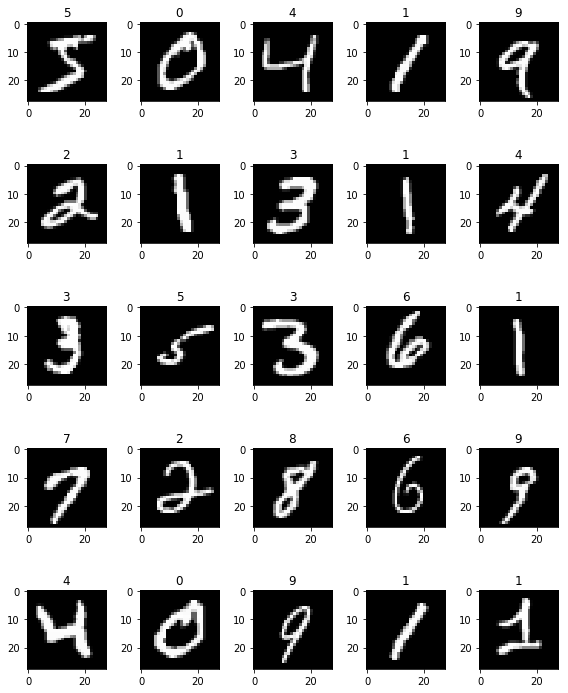

In [8]:
fig, axes = plt.subplots(5, 5, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap = "gray")
    ax.set_title(y_train[i])
plt.tight_layout()

(array([38847859.,   571880.,   514157.,   438029.,   446644.,   503214.,
          469607.,   518723.,   611860.,  4118027.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

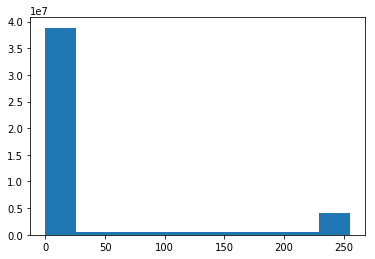

In [9]:
plt.hist(X_train.flatten())

In [10]:
a = X_train.flatten()
np.sum(a == 0)/len(a)

0.8087977040816327

In [11]:
X_train = df_train.iloc[:, 1:].values/255
X_test = df_test.iloc[:, 1:].values/255
y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:, 0]

In [13]:
%%time 

est = linear_model.SGDClassifier(loss = "log", n_jobs=6, tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 1000)
est.fit(X_train, y_train)
print("test accuracy", est.score(X_test, y_test))

test accuracy 0.8991
CPU times: user 1min 35s, sys: 185 ms, total: 1min 35s
Wall time: 24.8 s


In [14]:
y_test_pred = est.predict(X_test)

In [17]:
y_test_pred.shape

(10000,)

In [15]:
error = (y_test!=y_test_pred)

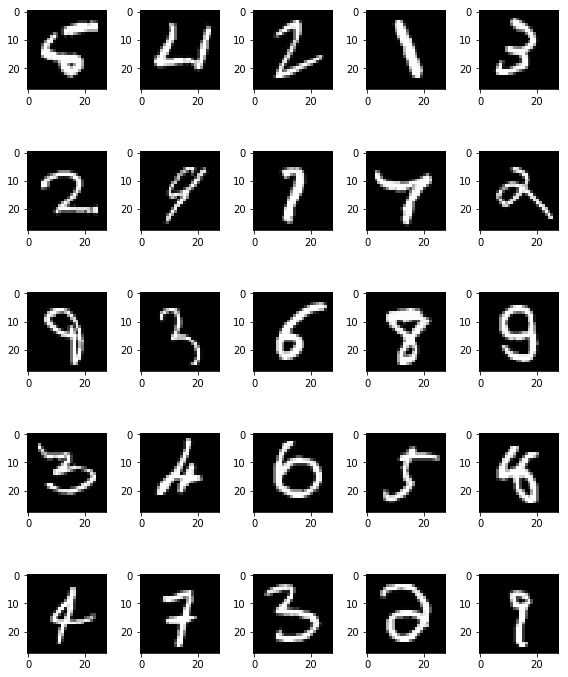

In [25]:
fig, axes = plt.subplots(5, 5, figsize = (8, 10))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_test[error][i].reshape((28, 28)), cmap = "gray")
    #ax.set_title(y_test[error][i])
plt.tight_layout()

In [28]:
pd.Series(y_train).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: 0, dtype: int64

In [29]:
import keras

Using TensorFlow backend.


In [38]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
pd.DataFrame(Y_train).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
model = keras.Sequential()

model.add(keras.layers.InputLayer(input_shape=(784,)))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

model.compile("adam", loss = keras.losses.categorical_crossentropy, metrics=["accuracy"])


model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=128, epochs=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2523 - acc: 0.9269 - val_loss: 0.1137 - val_acc: 0.9652
Epoch 2/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0930 - acc: 0.9716 - val_loss: 0.0988 - val_acc: 0.9693
Epoch 3/10
60000/60000 [==============================] - 3s 49us/step - los